Binary classification with Kaggle dataset - Airline Passenger Satisfaction https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/neural_networks_fiit/Project_1/data/train.csv")

In [ ]:
df.shape

(103904, 25)

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
df.nunique()

,0
Unnamed: 0,103904
id,103904
Gender,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,3802
Inflight wifi service,6
Departure/Arrival time convenient,6


In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


<Axes: >

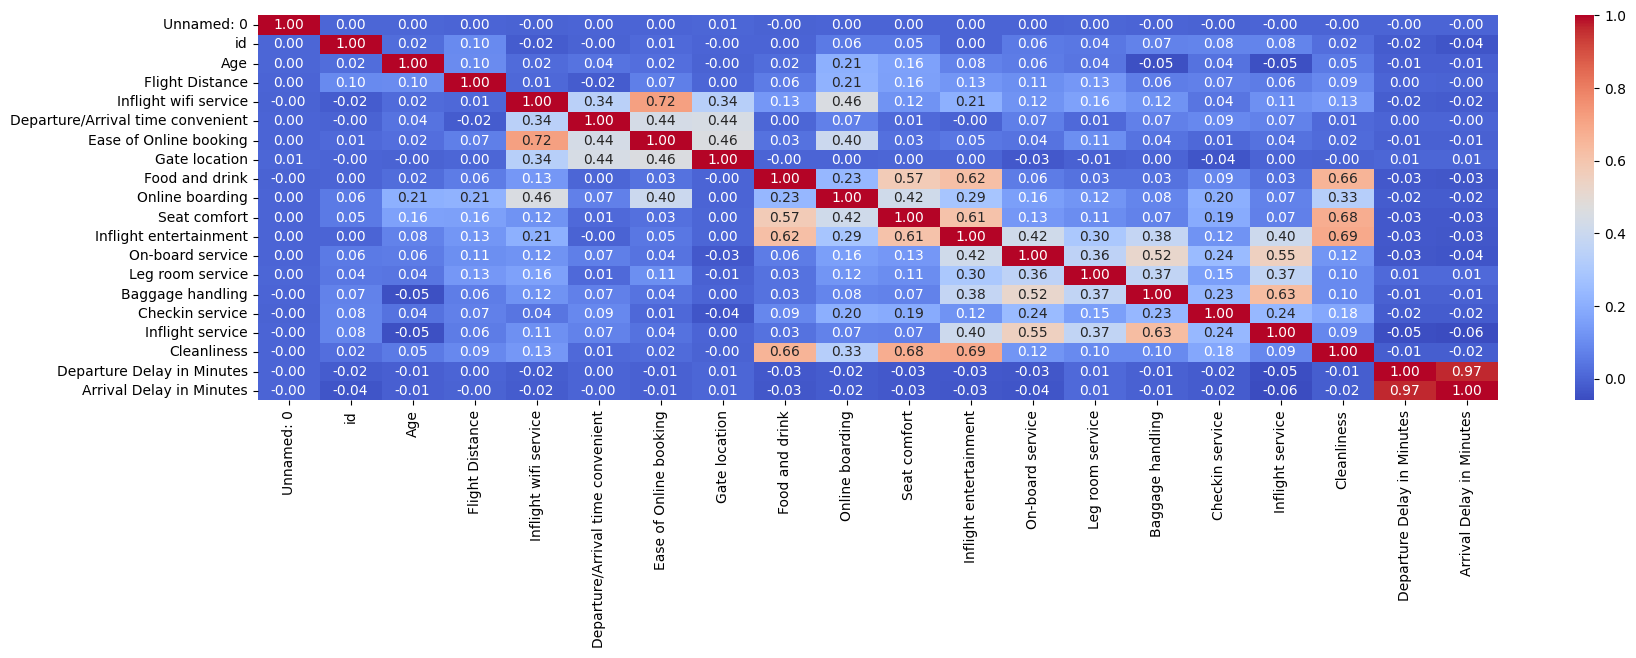

In [ ]:
corr_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm', fmt=".2f")

([0, 1], [Text(0, 0, 'neutral or dissatisfied'), Text(1, 0, 'satisfied')])

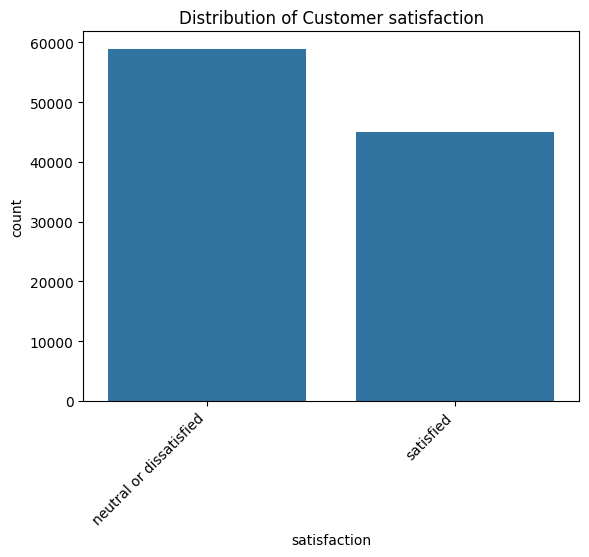

In [ ]:
satisfaction_counts = df['satisfaction'].value_counts()

sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts)

plt.title('Distribution of Customer satisfaction')
plt.xticks(rotation=45, ha='right')

([0, 1], [Text(0, 0, 'Loyal Customer'), Text(1, 0, 'disloyal Customer')])

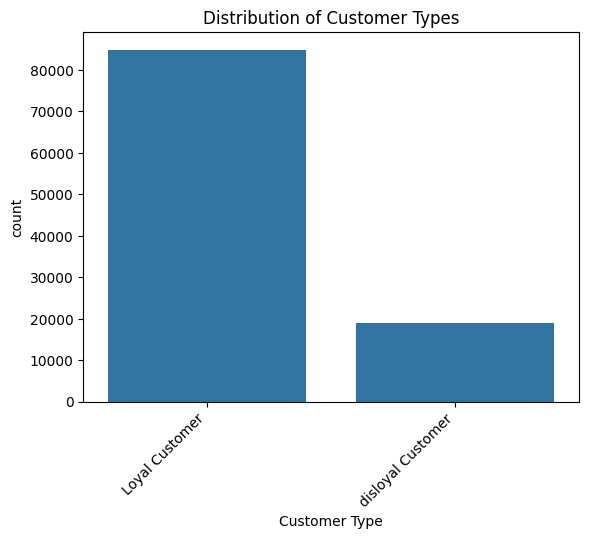

In [ ]:
customer_type_counts = df['Customer Type'].value_counts()

sns.barplot(x=customer_type_counts.index, y=customer_type_counts)

plt.title('Distribution of Customer Types')
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Age', ylabel='satisfaction'>

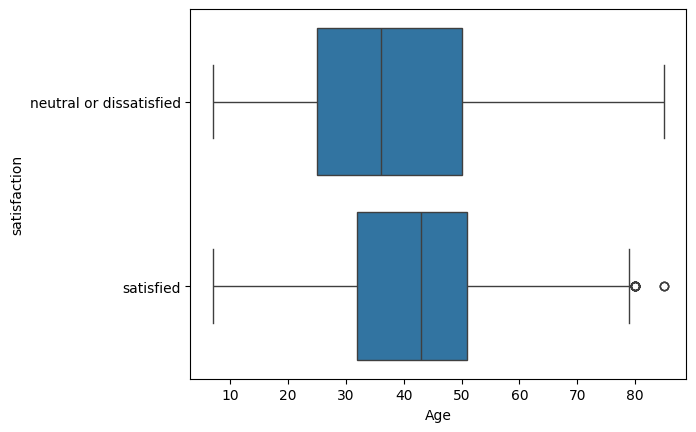

In [ ]:
sns.boxplot( x="Age", y='satisfaction', data=df)

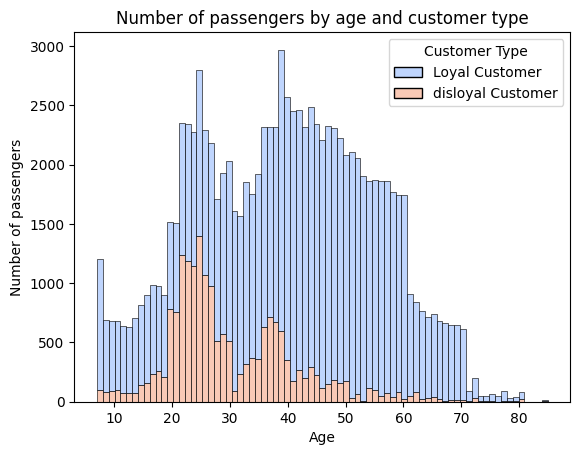

In [ ]:
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "coolwarm", edgecolor = "black")
plt.title('Number of passengers by age and customer type')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

<ipython-input-16-07e9077dbf1c>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'], bins=30, kde=True,  palette = "coolwarm", edgecolor='black')


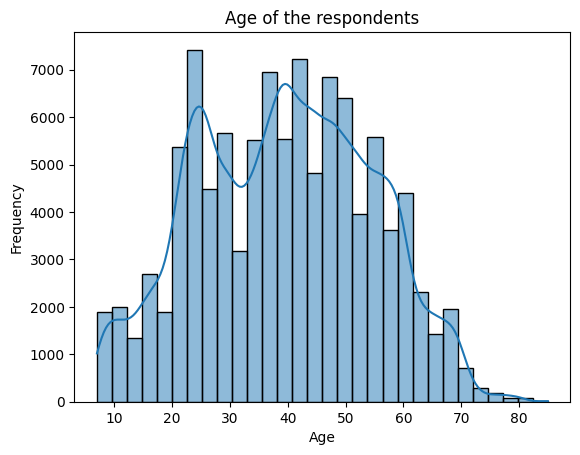

In [ ]:
sns.histplot(df['Age'], bins=30, kde=True,  palette = "coolwarm", edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of the respondents')
plt.show()

<ipython-input-17-2bf92ac9fea9>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Flight Distance'], bins=30, kde=True, palette = "coolwarm", edgecolor='black')


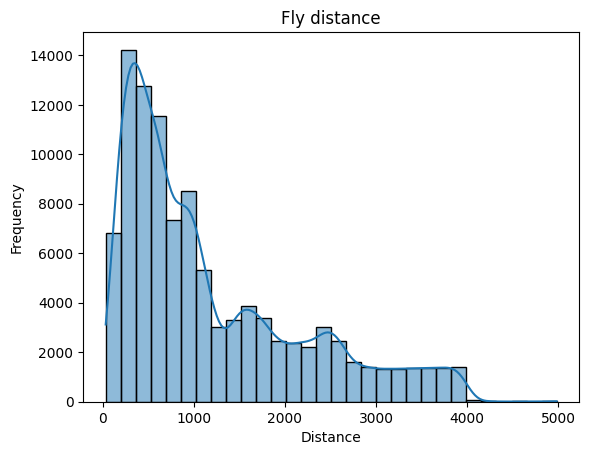

In [ ]:
sns.histplot(df['Flight Distance'], bins=30, kde=True, palette = "coolwarm", edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Fly distance')
plt.show()

Text(0.5, 1.0, 'Fly distance')

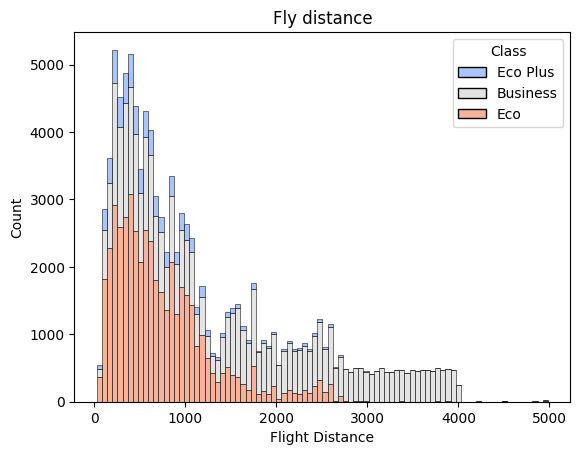

In [ ]:
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "coolwarm", edgecolor = "black")
plt.title('Fly distance')

# Data preprocessing

Drop first two columns

In [ ]:
df = df.drop(df.columns[:2], axis=1)
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Rename columns

In [ ]:
df = df.rename(columns = str.lower)
df.columns

Index(['gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df = df.rename(columns = {
    'unnamed: 0' : 'number',
    'customer type' : 'customer_type',
    'type of travel' : 'travel_type',
    'flight distance' : 'distance',
    'inflight wifi service' : 'wifi',
    'departure/arrival time convenient' : 'convenientt_time',
    'ease of online booking' : 'online_booking',
    'gate location' : 'gate_location',
    'food and drink' : 'food_drink',
    'online boarding' : 'online_boarding',
    'seat comfort' : 'seat_comfort',
    'inflight entertainment' : 'entertainment',
    'on-board service' : 'on_board_service',
    'leg room service' : 'leg_room',
    'baggage handling' : 'baggage_handling',
    'checkin service' : 'checkin',
    'inflight service' : 'inflight_service',
    'departure delay in minutes' : 'departure_delay',
    'arrival delay in minutes' : 'arrival_delay',
})

Finding and cleaning null values

In [ ]:
df.isna().sum()

,0
gender,0
customer_type,0
age,0
travel_type,0
class,0
distance,0
wifi,0
convenientt_time,0
online_booking,0
gate_location,0


In [ ]:
df['arrival_delay'].fillna(df['arrival_delay'].mean(), inplace=True)

<ipython-input-23-70dc9fdd426f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival_delay'].fillna(df['arrival_delay'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
gender,0
customer_type,0
age,0
travel_type,0
class,0
distance,0
wifi,0
convenientt_time,0
online_booking,0
gate_location,0


Delete duplicate data

In [ ]:
df.duplicated().sum()

0

Data encoding - converting categorical variabels into nemurical

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_num = df.select_dtypes(exclude='object')
X_cat = df.select_dtypes(include='object')

enc = OneHotEncoder(sparse_output=False)
X_cat_encoded = enc.fit_transform(X_cat)

In [ ]:
encoded_columns = enc.get_feature_names_out(input_features=X_cat.columns)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoded_columns, index = X_cat.index)
df_encoded = pd.concat([X_num, X_cat_encoded_df], axis=1)

In [ ]:
df_encoded.head()

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,25,235,3,2,3,3,1,3,1,1,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,25,562,2,5,5,5,2,2,2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.describe().loc[['min', 'max']]

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
min,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Data scaling - getting numerical data to interval from 0 to 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_encoded[X_num.columns] = scaler.fit_transform(df_encoded[X_num.columns])

In [ ]:
df_encoded.describe().loc[['min', 'max']]

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_encoded.drop(columns=['satisfaction_neutral or dissatisfied'], inplace=True)

In [ ]:
df_encoded = df_encoded.rename(columns = {
    'satisfaction_satisfied' : 'satisfaction',
})

In [ ]:
df_encoded.head()

,age,distance,wifi,convenientt_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertainment,...,gender_Female,gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,travel_type_Business travel,travel_type_Personal Travel,class_Business,class_Eco,class_Eco Plus,satisfaction
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Model building - MLP binar classification

In [ ]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 2.0 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as tnf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torcheval.metrics.functional import binary_f1_score, binary_accuracy, binary_confusion_matrix, binary_recall, binary_precision

Model parameters

In [ ]:
class Parameters():
  lr = 0.001
  batch_size_train = 32
  batch_size_val = 128
  epochs = 100
  input_dim = 27
  hidden_dim = 256
  output_dim = 1

params = Parameters()

Create the model - MLP

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(hidden_dim, hidden_dim),
        nn.BatchNorm1d(hidden_dim),
        nn.ReLU(),

        nn.Linear(hidden_dim, output_dim)
        # nn.Sigmoid()
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model = MLP(input_dim=params.input_dim, hidden_dim=params.hidden_dim, output_dim=params.output_dim).to(device)

Split data before training

In [ ]:
X = df_encoded.drop(columns=['satisfaction'])
Y = df_encoded['satisfaction']

print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

X: (103904, 27)
Y: (103904,)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 42, stratify = Y)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_valid:', x_val.shape)
print('y_valid:', y_val.shape)

x_train: (83123, 27)
y_train: (83123,)
x_valid: (20781, 27)
y_valid: (20781,)


Convert to tensors

In [ ]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

Create DataLoader

In [ ]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=params.batch_size_train, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=params.batch_size_val, shuffle=False)

Loss function and optimizer

In [ ]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=params.lr)

*Training* and *validation* loop with metrics

> Add blockquote



In [ ]:
epochs = params.epochs

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
  with tqdm(total=len(train_dataloader), position=0, leave=True) as progress_bar:

    model.train()

    total_loss = 0
    total_acc = 0
    total_f1 = 0

    for x,y in train_dataloader:
      x, y = x.to(device), y.to(device)

      # Clear gradient from the optimizer
      optimizer.zero_grad()

      # Forward pass
      y_logits = model(x).squeeze()

      # Calulate loss
      loss = loss_fn(y_logits, y)

      # Backward pass
      loss.backward()

      # One step of the optimizer - update model parametres
      optimizer.step()

      # Calculate metrics
      y_pred = torch.round(torch.sigmoid(y_logits))

      acc = binary_accuracy(y_pred, y).item()
      f1 = binary_f1_score(y_pred, y).item()

      total_loss += loss.item()
      total_acc += acc
      total_f1 += f1

      # Update progress bar
      progress_bar.set_postfix_str(f"Epoch: {epoch}, Avg. train loss: {total_loss / len(train_dataloader)}, Avg. train acc: {total_acc / len(train_dataloader)}")
      progress_bar.update(1)

  # Average metrics
  avg_loss = total_loss / len(train_dataloader)
  avg_acc = total_acc / len(train_dataloader)
  avg_f1 = total_f1 / len(train_dataloader)

  train_losses.append(avg_loss)
  train_accuracies.append(avg_acc)

  # ------------------------------------------------------------------------------------------------------------------------------------------------
  # Validation loop
  model.eval()

  total_val_f1 = 0
  total_val_loss = 0
  total_val_acc = 0

  with torch.inference_mode():
    for x,y in val_dataloader:
      x, y = x.to(device), y.to(device)

      # Forward pass
      val_logits = model(x).squeeze()
      val_pred = torch.round(torch.sigmoid(val_logits))

      # Calculate loss
      val_loss = loss_fn(val_logits, y)

      # Calculate metrics
      val_acc = binary_accuracy(val_pred, y).item()
      val_f1 = binary_f1_score(val_pred, y).item()

      total_val_loss += val_loss.item()
      total_val_acc += val_acc
      total_val_f1 += val_f1

  avg_val_acc = total_val_acc / len(val_dataloader)
  avg_val_f1 = total_val_f1 / len(val_dataloader)
  avg_val_loss = total_val_loss / len(val_dataloader)

  val_losses.append(avg_val_loss)
  val_accuracies.append(avg_val_acc)

  print(f"Avg val loss: {avg_val_loss}, Avg val accuracy: {avg_val_acc}, Avg val F1 score: {avg_val_f1}")

100%|██████████| 2598/2598 [00:13<00:00, 189.18it/s, Epoch: 0, Avg. train loss: 0.21394832541175285, Avg. train acc: 0.9132062619103203]


Avg val loss: 0.1347816301726856, Avg val accuracy: 0.9455596029392781, Avg val F1 score: 0.9362708224109345


100%|██████████| 2598/2598 [00:12<00:00, 208.45it/s, Epoch: 1, Avg. train loss: 0.1666090832076812, Avg. train acc: 0.9315699576597383]


Avg val loss: 0.1161778923923984, Avg val accuracy: 0.9523655845343701, Avg val F1 score: 0.9440914454635667


100%|██████████| 2598/2598 [00:12<00:00, 203.54it/s, Epoch: 2, Avg. train loss: 0.14965668763589685, Avg. train acc: 0.9392238716100894]


Avg val loss: 0.11137020994731985, Avg val accuracy: 0.9551454925098302, Avg val F1 score: 0.9476087060442732


100%|██████████| 2598/2598 [00:12<00:00, 202.02it/s, Epoch: 3, Avg. train loss: 0.14201587993146894, Avg. train acc: 0.9422550494391887]


Avg val loss: 0.10341375618258868, Avg val accuracy: 0.9571180555718076, Avg val F1 score: 0.9490048848778192


100%|██████████| 2598/2598 [00:12<00:00, 200.47it/s, Epoch: 4, Avg. train loss: 0.13439774082212194, Avg. train acc: 0.9446689761354888]


Avg val loss: 0.10515009209605082, Avg val accuracy: 0.9557281015840776, Avg val F1 score: 0.9479432230346774


100%|██████████| 2598/2598 [00:13<00:00, 198.91it/s, Epoch: 5, Avg. train loss: 0.13129666199609408, Avg. train acc: 0.9462003920103973]


Avg val loss: 0.10092237888852511, Avg val accuracy: 0.9576932089460408, Avg val F1 score: 0.9504096383697416


100%|██████████| 2598/2598 [00:13<00:00, 198.97it/s, Epoch: 6, Avg. train loss: 0.12913943761264227, Avg. train acc: 0.9467296452821449]


Avg val loss: 0.0990613741925889, Avg val accuracy: 0.9586997273509488, Avg val F1 score: 0.9511644917031739


100%|██████████| 2598/2598 [00:12<00:00, 200.72it/s, Epoch: 7, Avg. train loss: 0.1268425014452884, Avg. train acc: 0.9475596106401125]


Avg val loss: 0.09622822226556532, Avg val accuracy: 0.9593707396208875, Avg val F1 score: 0.9520830453539187


100%|██████████| 2598/2598 [00:12<00:00, 204.09it/s, Epoch: 8, Avg. train loss: 0.12307882443317043, Avg. train acc: 0.9492917122567407]


Avg val loss: 0.09500785794771888, Avg val accuracy: 0.9611771472392638, Avg val F1 score: 0.9542355478906924


100%|██████████| 2598/2598 [00:12<00:00, 207.37it/s, Epoch: 9, Avg. train loss: 0.11924881041924641, Avg. train acc: 0.9507591872374951]


Avg val loss: 0.09437446621892277, Avg val accuracy: 0.9590203220858896, Avg val F1 score: 0.9517156719430092


100%|██████████| 2598/2598 [00:12<00:00, 206.63it/s, Epoch: 10, Avg. train loss: 0.11718293960927466, Avg. train acc: 0.9513162959301077]


Avg val loss: 0.09105143547515196, Avg val accuracy: 0.961807685761364, Avg val F1 score: 0.9549932509112212


100%|██████████| 2598/2598 [00:12<00:00, 207.69it/s, Epoch: 11, Avg. train loss: 0.11414653991741215, Avg. train acc: 0.9526077752117013]


Avg val loss: 0.09323342662144658, Avg val accuracy: 0.9598905078472535, Avg val F1 score: 0.9528138575378371


100%|██████████| 2598/2598 [00:12<00:00, 206.85it/s, Epoch: 12, Avg. train loss: 0.11537677235722117, Avg. train acc: 0.9527679439734458]


Avg val loss: 0.08993226175476438, Avg val accuracy: 0.9618556152092167, Avg val F1 score: 0.9550480641470365


100%|██████████| 2598/2598 [00:12<00:00, 201.33it/s, Epoch: 13, Avg. train loss: 0.11270706423377623, Avg. train acc: 0.9526476591389578]


Avg val loss: 0.09022298980892801, Avg val accuracy: 0.9612399880871451, Avg val F1 score: 0.9543485188045384


100%|██████████| 2598/2598 [00:12<00:00, 204.55it/s, Epoch: 14, Avg. train loss: 0.11201455873086635, Avg. train acc: 0.9540429632190194]


Avg val loss: 0.08818075997880631, Avg val accuracy: 0.9622869802398916, Avg val F1 score: 0.9554346946119531


100%|██████████| 2598/2598 [00:12<00:00, 203.04it/s, Epoch: 15, Avg. train loss: 0.111327678524836, Avg. train acc: 0.9543075898548931]


Avg val loss: 0.089072450858318, Avg val accuracy: 0.9621506475963475, Avg val F1 score: 0.955222638106785


100%|██████████| 2598/2598 [00:12<00:00, 204.90it/s, Epoch: 16, Avg. train loss: 0.1108396933498284, Avg. train acc: 0.953497882986913]


Avg val loss: 0.08801136648088145, Avg val accuracy: 0.9624786980313026, Avg val F1 score: 0.9556356401531243


100%|██████████| 2598/2598 [00:12<00:00, 204.57it/s, Epoch: 17, Avg. train loss: 0.10891624974474752, Avg. train acc: 0.9551014697625143]


Avg val loss: 0.08819600907754313, Avg val accuracy: 0.9627183452705664, Avg val F1 score: 0.9561704887202912


100%|██████████| 2598/2598 [00:12<00:00, 204.85it/s, Epoch: 18, Avg. train loss: 0.10723413446999863, Avg. train acc: 0.9553939518192532]


Avg val loss: 0.08871244961407287, Avg val accuracy: 0.9619035446570695, Avg val F1 score: 0.9553262595018727


100%|██████████| 2598/2598 [00:12<00:00, 203.91it/s, Epoch: 19, Avg. train loss: 0.106399084407667, Avg. train acc: 0.9559795490542772]


Avg val loss: 0.08681008845933376, Avg val accuracy: 0.9627737304184334, Avg val F1 score: 0.9559234044303192


100%|██████████| 2598/2598 [00:12<00:00, 204.52it/s, Epoch: 20, Avg. train loss: 0.10518205203969115, Avg. train acc: 0.9555344951666713]


Avg val loss: 0.08707876258923963, Avg val accuracy: 0.9629505368098159, Avg val F1 score: 0.9562992091559194


100%|██████████| 2598/2598 [00:12<00:00, 207.37it/s, Epoch: 21, Avg. train loss: 0.10504723314068254, Avg. train acc: 0.9561802347959969]


Avg val loss: 0.08618840153551906, Avg val accuracy: 0.9634298312883436, Avg val F1 score: 0.9568756131306748


100%|██████████| 2598/2598 [00:12<00:00, 207.88it/s, Epoch: 22, Avg. train loss: 0.10457650813907872, Avg. train acc: 0.9568538298691301]


Avg val loss: 0.08621238895400536, Avg val accuracy: 0.9626150306748467, Avg val F1 score: 0.9559393159450928


100%|██████████| 2598/2598 [00:12<00:00, 206.80it/s, Epoch: 23, Avg. train loss: 0.10257216004562995, Avg. train acc: 0.957298883756736]


Avg val loss: 0.08708574862842179, Avg val accuracy: 0.961615967969953, Avg val F1 score: 0.9547752394266655


100%|██████████| 2598/2598 [00:12<00:00, 207.22it/s, Epoch: 24, Avg. train loss: 0.10338069879187499, Avg. train acc: 0.9567291134820708]


Avg val loss: 0.08467047163313883, Avg val accuracy: 0.9639645109147382, Avg val F1 score: 0.9576203662193626


100%|██████████| 2598/2598 [00:12<00:00, 203.27it/s, Epoch: 25, Avg. train loss: 0.10256274031026015, Avg. train acc: 0.9575635103926097]


Avg val loss: 0.08468962525891746, Avg val accuracy: 0.9647718558282209, Avg val F1 score: 0.958403124034039


100%|██████████| 2598/2598 [00:12<00:00, 202.93it/s, Epoch: 26, Avg. train loss: 0.10359706310143091, Avg. train acc: 0.9573666231048575]


Avg val loss: 0.08573648190708613, Avg val accuracy: 0.9634777607361963, Avg val F1 score: 0.9567890317162122


100%|██████████| 2598/2598 [00:12<00:00, 202.03it/s, Epoch: 27, Avg. train loss: 0.10073893115259965, Avg. train acc: 0.9576635367371101]


Avg val loss: 0.08514251697100013, Avg val accuracy: 0.9634852164362105, Avg val F1 score: 0.9569776010659575


100%|██████████| 2598/2598 [00:12<00:00, 202.57it/s, Epoch: 28, Avg. train loss: 0.10199768129900905, Avg. train acc: 0.9576837952270978]


Avg val loss: 0.08438643890838682, Avg val accuracy: 0.964148773006135, Avg val F1 score: 0.9576729049711871


100%|██████████| 2598/2598 [00:12<00:00, 203.16it/s, Epoch: 29, Avg. train loss: 0.10158898273097197, Avg. train acc: 0.9576192212572825]


Avg val loss: 0.08387984267430254, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.958156738910207


100%|██████████| 2598/2598 [00:12<00:00, 200.76it/s, Epoch: 30, Avg. train loss: 0.10048506869267733, Avg. train acc: 0.957855992472291]


Avg val loss: 0.084643564661222, Avg val accuracy: 0.9640049846625767, Avg val F1 score: 0.9576047088470927


100%|██████████| 2598/2598 [00:12<00:00, 202.32it/s, Epoch: 31, Avg. train loss: 0.10100676053797997, Avg. train acc: 0.9581364460455811]


Avg val loss: 0.08411936134534197, Avg val accuracy: 0.9643884202453987, Avg val F1 score: 0.9580237916642171


100%|██████████| 2598/2598 [00:12<00:00, 204.22it/s, Epoch: 32, Avg. train loss: 0.09939443834656182, Avg. train acc: 0.958841695039432]


Avg val loss: 0.08431522852164104, Avg val accuracy: 0.9637653374233128, Avg val F1 score: 0.9573557431712473


100%|██████████| 2598/2598 [00:12<00:00, 206.53it/s, Epoch: 33, Avg. train loss: 0.09912089988676397, Avg. train acc: 0.958581499933187]


Avg val loss: 0.0839826600751811, Avg val accuracy: 0.9646355231846768, Avg val F1 score: 0.9581077822878317


100%|██████████| 2598/2598 [00:12<00:00, 201.64it/s, Epoch: 34, Avg. train loss: 0.09899017090258189, Avg. train acc: 0.9582731909160893]


Avg val loss: 0.08304167585733112, Avg val accuracy: 0.963957055214724, Avg val F1 score: 0.957602640968159


100%|██████████| 2598/2598 [00:13<00:00, 196.92it/s, Epoch: 35, Avg. train loss: 0.09832746316160823, Avg. train acc: 0.9589784398869976]


Avg val loss: 0.08385452214468476, Avg val accuracy: 0.9633819018404908, Avg val F1 score: 0.9566520397648489


100%|██████████| 2598/2598 [00:13<00:00, 198.65it/s, Epoch: 36, Avg. train loss: 0.09854901779774258, Avg. train acc: 0.9583814472671286]


Avg val loss: 0.0837482450404233, Avg val accuracy: 0.9638611963190185, Avg val F1 score: 0.9573916039583873


100%|██████████| 2598/2598 [00:13<00:00, 198.19it/s, Epoch: 37, Avg. train loss: 0.09826962489332199, Avg. train acc: 0.9580604766909208]


Avg val loss: 0.08533854191220062, Avg val accuracy: 0.9631901840490797, Avg val F1 score: 0.9568939468611969


100%|██████████| 2598/2598 [00:13<00:00, 197.30it/s, Epoch: 38, Avg. train loss: 0.0974391468394988, Avg. train acc: 0.9595241531947653]


Avg val loss: 0.0831330075882878, Avg val accuracy: 0.9648197852760736, Avg val F1 score: 0.9584792760983567


100%|██████████| 2598/2598 [00:13<00:00, 199.27it/s, Epoch: 39, Avg. train loss: 0.09804932718212538, Avg. train acc: 0.9591708956221785]


Avg val loss: 0.08337165894946712, Avg val accuracy: 0.9640049846625767, Avg val F1 score: 0.9575120550723164


100%|██████████| 2598/2598 [00:13<00:00, 198.55it/s, Epoch: 40, Avg. train loss: 0.09836858898896675, Avg. train acc: 0.9593633513573594]


Avg val loss: 0.08301499225427768, Avg val accuracy: 0.9647239263803681, Avg val F1 score: 0.9584814690373427


100%|██████████| 2598/2598 [00:12<00:00, 200.95it/s, Epoch: 41, Avg. train loss: 0.09762978395791273, Avg. train acc: 0.95947983773788]


Avg val loss: 0.08291451099894347, Avg val accuracy: 0.9640049846625767, Avg val F1 score: 0.9576003482005347


100%|██████████| 2598/2598 [00:13<00:00, 198.91it/s, Epoch: 42, Avg. train loss: 0.09514603214928116, Avg. train acc: 0.9601331742980831]


Avg val loss: 0.08238329565826735, Avg val accuracy: 0.9644842791411042, Avg val F1 score: 0.9581206301969984


100%|██████████| 2598/2598 [00:13<00:00, 198.61it/s, Epoch: 43, Avg. train loss: 0.09585083430259057, Avg. train acc: 0.9597204074068562]


Avg val loss: 0.08411898511959, Avg val accuracy: 0.964340490797546, Avg val F1 score: 0.9580177726921129


100%|██████████| 2598/2598 [00:12<00:00, 203.28it/s, Epoch: 44, Avg. train loss: 0.09652429921649328, Avg. train acc: 0.9595038947047776]


Avg val loss: 0.08319888258227176, Avg val accuracy: 0.9643884202453987, Avg val F1 score: 0.9580719405156704


100%|██████████| 2598/2598 [00:12<00:00, 203.64it/s, Epoch: 45, Avg. train loss: 0.09574964717760025, Avg. train acc: 0.9596805234795996]


Avg val loss: 0.08381817786400121, Avg val accuracy: 0.9629026073619632, Avg val F1 score: 0.9563855890847422


100%|██████████| 2598/2598 [00:12<00:00, 201.80it/s, Epoch: 46, Avg. train loss: 0.09492472471951438, Avg. train acc: 0.9603699455130917]


Avg val loss: 0.08214307596415647, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.9591772110184278


100%|██████████| 2598/2598 [00:13<00:00, 197.31it/s, Epoch: 47, Avg. train loss: 0.09514504424285565, Avg. train acc: 0.960165461294462]


Avg val loss: 0.08194868030323664, Avg val accuracy: 0.964148773006135, Avg val F1 score: 0.9577860916319069


100%|██████████| 2598/2598 [00:13<00:00, 196.01it/s, Epoch: 48, Avg. train loss: 0.09670148898657946, Avg. train acc: 0.9599850340427298]


Avg val loss: 0.08218378372536116, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9583162577605686


100%|██████████| 2598/2598 [00:13<00:00, 198.13it/s, Epoch: 49, Avg. train loss: 0.09468298281142896, Avg. train acc: 0.9598248652809854]


Avg val loss: 0.08389970505370135, Avg val accuracy: 0.9636694785276073, Avg val F1 score: 0.9572332537978705


100%|██████████| 2598/2598 [00:13<00:00, 196.44it/s, Epoch: 50, Avg. train loss: 0.09379438966345272, Avg. train acc: 0.9603579170296429]


Avg val loss: 0.0836075369405783, Avg val accuracy: 0.9644363496932515, Avg val F1 score: 0.9580540905700871


100%|██████████| 2598/2598 [00:13<00:00, 197.54it/s, Epoch: 51, Avg. train loss: 0.09560773924878638, Avg. train acc: 0.95947603926097]


Avg val loss: 0.08183615273607472, Avg val accuracy: 0.9654907975460123, Avg val F1 score: 0.9593041001653378


100%|██████████| 2598/2598 [00:13<00:00, 197.32it/s, Epoch: 52, Avg. train loss: 0.09229043711996168, Avg. train acc: 0.9608713433410315]


Avg val loss: 0.08373491923993259, Avg val accuracy: 0.9636694785276073, Avg val F1 score: 0.9572630623366936


100%|██████████| 2598/2598 [00:13<00:00, 196.93it/s, Epoch: 53, Avg. train loss: 0.09514884862374318, Avg. train acc: 0.959539980155124]


Avg val loss: 0.08231838036648517, Avg val accuracy: 0.9649156441717791, Avg val F1 score: 0.9585668707917805


100%|██████████| 2598/2598 [00:12<00:00, 203.72it/s, Epoch: 54, Avg. train loss: 0.09327232370698313, Avg. train acc: 0.9604661733806822]


Avg val loss: 0.08070086479826939, Avg val accuracy: 0.9663055981595092, Avg val F1 score: 0.9601389751112535


100%|██████████| 2598/2598 [00:12<00:00, 203.84it/s, Epoch: 55, Avg. train loss: 0.09410961551419326, Avg. train acc: 0.9607871439568899]


Avg val loss: 0.08237033843868441, Avg val accuracy: 0.9652990797546013, Avg val F1 score: 0.9589231211714949


100%|██████████| 2598/2598 [00:13<00:00, 195.73it/s, Epoch: 56, Avg. train loss: 0.09339306667062444, Avg. train acc: 0.9605744297317215]


Avg val loss: 0.08163241554405883, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.9591521598810068


100%|██████████| 2598/2598 [00:13<00:00, 195.40it/s, Epoch: 57, Avg. train loss: 0.09289417924325206, Avg. train acc: 0.9609954266524297]


Avg val loss: 0.08272688042235338, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9581912284248446


100%|██████████| 2598/2598 [00:13<00:00, 195.11it/s, Epoch: 58, Avg. train loss: 0.09335050193223317, Avg. train acc: 0.9604256563777644]


Avg val loss: 0.08311196462896887, Avg val accuracy: 0.9644363496932515, Avg val F1 score: 0.9581216946701331


100%|██████████| 2598/2598 [00:13<00:00, 195.27it/s, Epoch: 59, Avg. train loss: 0.09293040624714662, Avg. train acc: 0.9607630869899924]


Avg val loss: 0.08122226431611583, Avg val accuracy: 0.965538726993865, Avg val F1 score: 0.9592397688356645


100%|██████████| 2598/2598 [00:13<00:00, 195.29it/s, Epoch: 60, Avg. train loss: 0.09229655645501293, Avg. train acc: 0.9600369464304926]


Avg val loss: 0.08210810315023902, Avg val accuracy: 0.9642446319018405, Avg val F1 score: 0.9578210250731626


100%|██████████| 2598/2598 [00:12<00:00, 202.06it/s, Epoch: 61, Avg. train loss: 0.09130987821984247, Avg. train acc: 0.961344252672445]


Avg val loss: 0.08227052706996539, Avg val accuracy: 0.9644363496932515, Avg val F1 score: 0.9580498615656894


100%|██████████| 2598/2598 [00:13<00:00, 195.11it/s, Epoch: 62, Avg. train loss: 0.09264805212440728, Avg. train acc: 0.9609555427251733]


Avg val loss: 0.08308835057370319, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.958278448669457


100%|██████████| 2598/2598 [00:13<00:00, 199.16it/s, Epoch: 63, Avg. train loss: 0.0911116950255851, Avg. train acc: 0.9615006229572796]


Avg val loss: 0.08275081283852824, Avg val accuracy: 0.9647239263803681, Avg val F1 score: 0.9584187353315529


100%|██████████| 2598/2598 [00:13<00:00, 196.38it/s, Epoch: 64, Avg. train loss: 0.09208461231258293, Avg. train acc: 0.9612758802257197]


Avg val loss: 0.08125070332223835, Avg val accuracy: 0.9648197852760736, Avg val F1 score: 0.9585460186735985


100%|██████████| 2598/2598 [00:13<00:00, 193.72it/s, Epoch: 65, Avg. train loss: 0.09195500439896573, Avg. train acc: 0.9614157904974766]


Avg val loss: 0.08190258338681759, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9588260932202719


100%|██████████| 2598/2598 [00:13<00:00, 193.19it/s, Epoch: 66, Avg. train loss: 0.09207012356001543, Avg. train acc: 0.9607706839208698]


Avg val loss: 0.08164809759066331, Avg val accuracy: 0.9654428680981595, Avg val F1 score: 0.959075335344654


100%|██████████| 2598/2598 [00:13<00:00, 196.66it/s, Epoch: 67, Avg. train loss: 0.09082558651539348, Avg. train acc: 0.9613683096393426]


Avg val loss: 0.08081424620253908, Avg val accuracy: 0.9652032208588958, Avg val F1 score: 0.9589788164097839


100%|██████████| 2598/2598 [00:13<00:00, 194.23it/s, Epoch: 68, Avg. train loss: 0.09106914934399664, Avg. train acc: 0.9615126514407284]


Avg val loss: 0.08306398073017049, Avg val accuracy: 0.9641967024539877, Avg val F1 score: 0.9579128732710528


100%|██████████| 2598/2598 [00:13<00:00, 198.53it/s, Epoch: 69, Avg. train loss: 0.09104603006259099, Avg. train acc: 0.961757019563672]


Avg val loss: 0.08163523159212678, Avg val accuracy: 0.9645801380368099, Avg val F1 score: 0.9582434450190491


100%|██████████| 2598/2598 [00:13<00:00, 198.29it/s, Epoch: 70, Avg. train loss: 0.0913391573755827, Avg. train acc: 0.9611676238746805]


Avg val loss: 0.08164166587696302, Avg val accuracy: 0.9647718558282209, Avg val F1 score: 0.9585577936991592


100%|██████████| 2598/2598 [00:13<00:00, 197.81it/s, Epoch: 71, Avg. train loss: 0.08970189137146177, Avg. train acc: 0.9616728201795304]


Avg val loss: 0.08228741093121607, Avg val accuracy: 0.9659221625766872, Avg val F1 score: 0.9596607019564857


100%|██████████| 2598/2598 [00:12<00:00, 200.95it/s, Epoch: 72, Avg. train loss: 0.09074473052830138, Avg. train acc: 0.9617810765305697]


Avg val loss: 0.08273883866706143, Avg val accuracy: 0.9649635736196319, Avg val F1 score: 0.9585358975855119


100%|██████████| 2598/2598 [00:13<00:00, 196.41it/s, Epoch: 73, Avg. train loss: 0.09049681984544161, Avg. train acc: 0.9614487105465743]


Avg val loss: 0.08350664807449272, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9580799059633829


100%|██████████| 2598/2598 [00:13<00:00, 196.01it/s, Epoch: 74, Avg. train loss: 0.08975909694897877, Avg. train acc: 0.9618937644341802]


Avg val loss: 0.08265047806080865, Avg val accuracy: 0.9642925613496932, Avg val F1 score: 0.9580973401391433


100%|██████████| 2598/2598 [00:13<00:00, 194.97it/s, Epoch: 75, Avg. train loss: 0.08917643701093007, Avg. train acc: 0.9621463625866051]


Avg val loss: 0.08122923279301109, Avg val accuracy: 0.9660180214723927, Avg val F1 score: 0.9599278411982249


100%|██████████| 2598/2598 [00:13<00:00, 194.29it/s, Epoch: 76, Avg. train loss: 0.09014020960169843, Avg. train acc: 0.9615689953810623]


Avg val loss: 0.08178429871060502, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.9590244841721892


100%|██████████| 2598/2598 [00:13<00:00, 198.71it/s, Epoch: 77, Avg. train loss: 0.08867782573688852, Avg. train acc: 0.9623907307324913]


Avg val loss: 0.08144875980936493, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9587057945918451


100%|██████████| 2598/2598 [00:13<00:00, 199.12it/s, Epoch: 78, Avg. train loss: 0.08880563960431714, Avg. train acc: 0.9620374731599046]


Avg val loss: 0.0845091568157534, Avg val accuracy: 0.9629505368098159, Avg val F1 score: 0.9565715647182582


100%|██████████| 2598/2598 [00:13<00:00, 198.02it/s, Epoch: 79, Avg. train loss: 0.08931246820576558, Avg. train acc: 0.9622185334872979]


Avg val loss: 0.08379574880815266, Avg val accuracy: 0.9633819018404908, Avg val F1 score: 0.9571095068761908


100%|██████████| 2598/2598 [00:13<00:00, 195.83it/s, Epoch: 80, Avg. train loss: 0.08968950602502165, Avg. train acc: 0.9618576789838337]


Avg val loss: 0.08208570025427027, Avg val accuracy: 0.965155291411043, Avg val F1 score: 0.9589028014727166


100%|██████████| 2598/2598 [00:13<00:00, 193.00it/s, Epoch: 81, Avg. train loss: 0.09086530116464502, Avg. train acc: 0.9614847959969207]


Avg val loss: 0.08176284871332667, Avg val accuracy: 0.9647718558282209, Avg val F1 score: 0.9583318855133525


100%|██████████| 2598/2598 [00:13<00:00, 191.58it/s, Epoch: 82, Avg. train loss: 0.08996184118042949, Avg. train acc: 0.9622343604476568]


Avg val loss: 0.08153452573378393, Avg val accuracy: 0.9652990797546013, Avg val F1 score: 0.9591533256454702


100%|██████████| 2598/2598 [00:13<00:00, 192.91it/s, Epoch: 83, Avg. train loss: 0.08894545706731946, Avg. train acc: 0.9621583910700539]


Avg val loss: 0.08294606843586165, Avg val accuracy: 0.9632860429447853, Avg val F1 score: 0.9568999607138838


100%|██████████| 2598/2598 [00:13<00:00, 194.10it/s, Epoch: 84, Avg. train loss: 0.08916166178540494, Avg. train acc: 0.9621982749973104]


Avg val loss: 0.08306212350440446, Avg val accuracy: 0.963957055214724, Avg val F1 score: 0.9574957767878574


100%|██████████| 2598/2598 [00:13<00:00, 195.43it/s, Epoch: 85, Avg. train loss: 0.08889592418520983, Avg. train acc: 0.9627959006928406]


Avg val loss: 0.0832454348040139, Avg val accuracy: 0.9642925613496932, Avg val F1 score: 0.9579324276169385


100%|██████████| 2598/2598 [00:12<00:00, 201.50it/s, Epoch: 86, Avg. train loss: 0.08886397800310977, Avg. train acc: 0.9618975629110902]


Avg val loss: 0.08353759294969995, Avg val accuracy: 0.9640529141104295, Avg val F1 score: 0.9577039878792558


100%|██████████| 2598/2598 [00:13<00:00, 198.35it/s, Epoch: 87, Avg. train loss: 0.0888936862920743, Avg. train acc: 0.9625990134050885]


Avg val loss: 0.081307693647415, Avg val accuracy: 0.9650594325153374, Avg val F1 score: 0.9588127202051548


100%|██████████| 2598/2598 [00:13<00:00, 194.50it/s, Epoch: 88, Avg. train loss: 0.08892879010584302, Avg. train acc: 0.9623267898383372]


Avg val loss: 0.08142815897115535, Avg val accuracy: 0.965347009202454, Avg val F1 score: 0.9590828034775388


100%|██████████| 2598/2598 [00:13<00:00, 194.68it/s, Epoch: 89, Avg. train loss: 0.08765080647825911, Avg. train acc: 0.962342616798696]


Avg val loss: 0.08187831178638924, Avg val accuracy: 0.9643884202453987, Avg val F1 score: 0.9580210856864789


100%|██████████| 2598/2598 [00:13<00:00, 192.29it/s, Epoch: 90, Avg. train loss: 0.0886868045968147, Avg. train acc: 0.9627237297921478]


Avg val loss: 0.08245742497280058, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9584862684911014


100%|██████████| 2598/2598 [00:13<00:00, 196.19it/s, Epoch: 91, Avg. train loss: 0.08762387068358947, Avg. train acc: 0.9633890948587422]


Avg val loss: 0.08230979162399754, Avg val accuracy: 0.9646759969325154, Avg val F1 score: 0.9583904593268786


100%|██████████| 2598/2598 [00:13<00:00, 193.55it/s, Epoch: 92, Avg. train loss: 0.08910017774751416, Avg. train acc: 0.9620982486528099]


Avg val loss: 0.08013678298966011, Avg val accuracy: 0.9656345858895705, Avg val F1 score: 0.959413235904249


100%|██████████| 2598/2598 [00:13<00:00, 197.29it/s, Epoch: 93, Avg. train loss: 0.08947465864591425, Avg. train acc: 0.9621463625866051]


Avg val loss: 0.08139542063721027, Avg val accuracy: 0.9655866564417178, Avg val F1 score: 0.9592687831334541


100%|██████████| 2598/2598 [00:13<00:00, 194.19it/s, Epoch: 94, Avg. train loss: 0.08762741796437543, Avg. train acc: 0.9628598415869947]


Avg val loss: 0.08096424283951155, Avg val accuracy: 0.9652032208588958, Avg val F1 score: 0.9589522177456347


100%|██████████| 2598/2598 [00:13<00:00, 193.37it/s, Epoch: 95, Avg. train loss: 0.0876871167103261, Avg. train acc: 0.9621704195535027]


Avg val loss: 0.08161880899552096, Avg val accuracy: 0.9647718558282209, Avg val F1 score: 0.9586595816114929


100%|██████████| 2598/2598 [00:13<00:00, 195.42it/s, Epoch: 96, Avg. train loss: 0.0872121396519529, Avg. train acc: 0.9633530094083957]


Avg val loss: 0.08109907363112902, Avg val accuracy: 0.965538726993865, Avg val F1 score: 0.9593956773997816


100%|██████████| 2598/2598 [00:13<00:00, 193.99it/s, Epoch: 97, Avg. train loss: 0.08733955053544479, Avg. train acc: 0.9629959533588991]


Avg val loss: 0.08178407255777277, Avg val accuracy: 0.964532208588957, Avg val F1 score: 0.9581823934075291


100%|██████████| 2598/2598 [00:13<00:00, 196.57it/s, Epoch: 98, Avg. train loss: 0.08696740776823089, Avg. train acc: 0.9638062933025404]


Avg val loss: 0.08053592755887772, Avg val accuracy: 0.965538726993865, Avg val F1 score: 0.9593001326168973


100%|██████████| 2598/2598 [00:13<00:00, 196.02it/s, Epoch: 99, Avg. train loss: 0.08830925113356797, Avg. train acc: 0.9630484988452656]


Avg val loss: 0.08178253246162749, Avg val accuracy: 0.9649635736196319, Avg val F1 score: 0.9586231339197218


Plot loss

In [ ]:
epochs_range = list(range(1, epochs + 1))

<ipython-input-57-744921805e56>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs_range, y=train_losses, label='Train Loss', palette="coolwarm")
<ipython-input-57-744921805e56>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs_range, y=val_losses, label='Validation Loss', palette="coolwarm", linestyle="dashed")


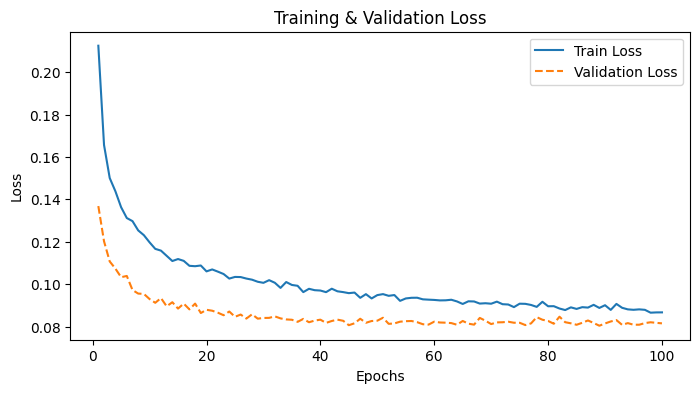

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=epochs_range, y=train_losses, label='Train Loss', palette="coolwarm")
sns.lineplot(x=epochs_range, y=val_losses, label='Validation Loss', palette="coolwarm", linestyle="dashed")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

Plot accuracy

<ipython-input-58-4a0880577f36>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs_range, y=train_accuracies, label='Train Accuracy', palette="coolwarm")
<ipython-input-58-4a0880577f36>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=epochs_range, y=val_accuracies, label='Validation Accuracy', palette="coolwarm", linestyle="dashed")


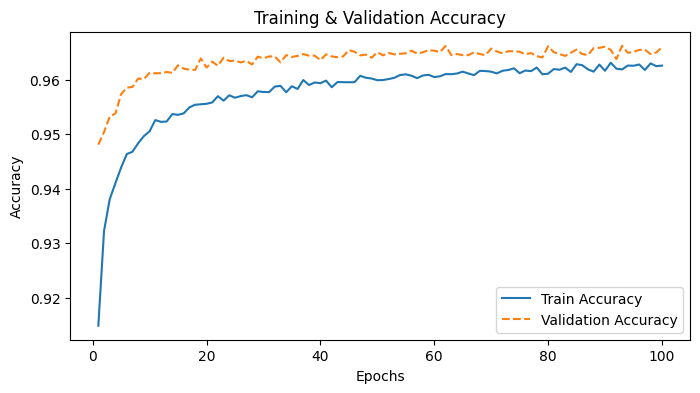

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=epochs_range, y=train_accuracies, label='Train Accuracy', palette="coolwarm")
sns.lineplot(x=epochs_range, y=val_accuracies, label='Validation Accuracy', palette="coolwarm", linestyle="dashed")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

Saving model weights


In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/neural_networks_fiit/Project_1/model_weights.pth")